# Uitwerkingen Bas Levering. Herkenning van handgeschreven cijfers met Deep Learning 1

## Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from tensorflow.keras.utils import to_categorical
from keras import models, layers
from keras.datasets import mnist

2021-09-16 19:36:10.799583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-16 19:36:10.799609: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Verover de data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [6]:
train_labels.shape

(60000,)

## Prepareer de images
#### Hier passen we de vorm van de data aan voor in de train set
#### Verder zetten we de data in een leesbaar float formaat om.


In [7]:

train_data = train_images.reshape((60000,28*28))

In [8]:
train_data.shape

(60000, 784)

In [9]:
train_data_floats = train_data.astype('float32')/255

In [10]:
train_data_floats.min()

0.0

In [11]:
test_data = test_images.reshape((10000,28*28))
test_data_floats = test_data.astype('float32')/255

In [12]:
test_data.shape

(10000, 784)

In [13]:
test_data_floats.max()

1.0

## Prepareer de labels
Hier zetten we de labels om van integers naar binary class matrix

In [14]:
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

In [15]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
train_labels_encoded[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Maak een model
Een model maken met drie lagen

In [17]:
model = models.Sequential()

model.add(layers.Dense(512,
                       activation = 'relu',
                       input_shape=(28*28,)))
model.add(layers.Dense(128,
                       activation = 'relu'))
model.add(layers.Dense(10,
                       activation = 'softmax'))

2021-09-16 19:36:12.688981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-16 19:36:12.689030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-16 19:36:12.689057: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2021-09-16 19:36:12.689249: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# een omschrijving van het model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compileer het model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
history = model.fit(
    train_data_floats,
    train_labels_encoded,
    epochs = 15,
    batch_size = 128,
    validation_data = (test_data_floats, test_labels_encoded)
)

2021-09-16 19:36:13.031194: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2399 - accuracy: 0.9306 - val_loss: 0.1045 - val_accuracy: 0.9674

In [21]:
test_loss, test_acc =model.evaluate(test_data_floats, test_labels_encoded)

print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9823

<module 'matplotlib.pyplot' from '/home/baz/PycharmProjects/jupyter_notebook/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

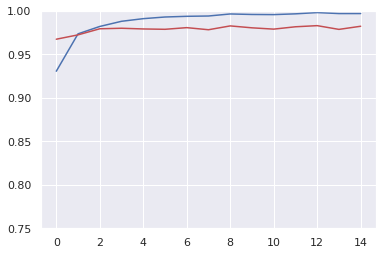

In [23]:
# Plot een grafiek
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt